In [4]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Define transformations to normalize the dataset (if not done already)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load CIFAR-10 training and test datasets
trainset = torchvision.datasets.CIFAR10(root='../data/cifar10', train=True,
                                        download=False, transform=transform)

testset = torchvision.datasets.CIFAR10(root='../data/cifar10', train=False,
                                       download=False, transform=transform)

# Create DataLoader to load the data in batches
trainloader = DataLoader(trainset, batch_size=256, shuffle=True, num_workers=2)
testloader = DataLoader(testset, batch_size=256, shuffle=False, num_workers=2)

# Check the shape of one batch of images
data_iter = iter(trainloader)
images, labels = next(data_iter) 
print("Batch of images shape:", images.shape)
print("Batch of labels shape:", labels.shape)


# Output:
# Batch of images shape: torch.Size([64, 3, 32, 32])  # 64 images, 3 channels (RGB), 32x32 pixels
# Batch of labels shape: torch.Size([64])  # 64 corresponding label


Batch of images shape: torch.Size([256, 3, 32, 32])
Batch of labels shape: torch.Size([256])


In [1]:
import sys
import os

sys.path.append('/home/cc7486/Documents/capstone/lim/natural-wm')

In [2]:
from sensory_model import ResNet
from configs.configs import BaseConfig

config = BaseConfig()
image_size = (3, 32, 32)

# Instantiate and print the model
model = ResNet(config.resblock_config, 
            image_size, 
            norm_layer=config.cnn_norm,
            width=config.cnn_width,
            spatial_average=config.spatial_average,
            num_classes=config.model_class_size
        )  # For CIFAR-10, num_classes=10
# print(model)


/home/cc7486/anaconda3/envs/wm/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# Save the model
torch.save(model.state_dict(), 'resnet_untrained.pth')
print("Model saved as resnet_untrained.pth")

Model saved as resnet_untrained.pth


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Function to train the model
def train(model, trainloader, criterion, optimizer, num_epochs=10, device='cpu'):
    model.train()  # Set the model to training mode
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct = 0
        total = 0
        
        for i, (inputs, labels) in enumerate(trainloader):
            # Move inputs and labels to the specified device
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Backward pass and optimize
            loss.backward()
            optimizer.step()

            # Print statistics
            running_loss += loss.item()
            
            # Calculate accuracy
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
            if i % 100 == 99:  # Print every 100 mini-batches
                avg_loss = running_loss / 100
                accuracy = 100 * correct / total
                print(f"[Epoch {epoch + 1}, Batch {i + 1}] loss: {avg_loss:.3f}, accuracy: {accuracy:.2f}%")
                running_loss = 0.0
                correct = 0
                total = 0  # Reset for the next 100 mini-batches
    print("Finished Training!")


# Function to evaluate the model
def evaluate(model, testloader):
    model.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0
    with torch.no_grad():  # Disable gradient computation
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)  # Get the predicted class
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    print(f'Accuracy on the test set: {accuracy:.2f}%')



In [6]:
model = ResNet(config.resblock_config, 
            image_size, 
            norm_layer=config.cnn_norm,
            width=config.cnn_width,
            spatial_average=config.spatial_average,
            num_classes=config.model_class_size
        ).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Train the model
train(model, trainloader, criterion, optimizer, num_epochs=75, device=device)

[Epoch 1, Batch 100] loss: 2.007, accuracy: 23.79%
[Epoch 2, Batch 100] loss: 1.560, accuracy: 42.42%
[Epoch 3, Batch 100] loss: 1.356, accuracy: 51.04%
[Epoch 4, Batch 100] loss: 1.224, accuracy: 56.43%
[Epoch 5, Batch 100] loss: 1.124, accuracy: 59.69%
[Epoch 6, Batch 100] loss: 1.049, accuracy: 62.37%
[Epoch 7, Batch 100] loss: 0.972, accuracy: 65.22%
[Epoch 8, Batch 100] loss: 0.939, accuracy: 66.69%
[Epoch 9, Batch 100] loss: 0.856, accuracy: 70.12%
[Epoch 10, Batch 100] loss: 0.847, accuracy: 70.08%
[Epoch 11, Batch 100] loss: 0.783, accuracy: 72.46%
[Epoch 12, Batch 100] loss: 0.738, accuracy: 73.77%
[Epoch 13, Batch 100] loss: 0.726, accuracy: 74.73%
[Epoch 14, Batch 100] loss: 0.702, accuracy: 75.27%
[Epoch 15, Batch 100] loss: 0.642, accuracy: 77.74%
[Epoch 16, Batch 100] loss: 0.637, accuracy: 77.84%
[Epoch 17, Batch 100] loss: 0.600, accuracy: 79.01%
[Epoch 18, Batch 100] loss: 0.596, accuracy: 79.10%
[Epoch 19, Batch 100] loss: 0.556, accuracy: 80.55%
[Epoch 20, Batch 100]

In [9]:
model = ResNet20(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Train the model
train(model, trainloader, criterion, optimizer, num_epochs=75, device=device)

[Epoch 1, Batch 100] loss: 1.606, accuracy: 40.46%
[Epoch 2, Batch 100] loss: 1.040, accuracy: 62.72%
[Epoch 3, Batch 100] loss: 0.802, accuracy: 71.49%
[Epoch 4, Batch 100] loss: 0.682, accuracy: 76.07%
[Epoch 5, Batch 100] loss: 0.582, accuracy: 79.82%
[Epoch 6, Batch 100] loss: 0.499, accuracy: 82.68%
[Epoch 7, Batch 100] loss: 0.451, accuracy: 84.27%
[Epoch 8, Batch 100] loss: 0.402, accuracy: 86.25%
[Epoch 9, Batch 100] loss: 0.359, accuracy: 87.80%
[Epoch 10, Batch 100] loss: 0.312, accuracy: 89.16%
[Epoch 11, Batch 100] loss: 0.275, accuracy: 90.53%
[Epoch 12, Batch 100] loss: 0.235, accuracy: 91.89%
[Epoch 13, Batch 100] loss: 0.201, accuracy: 93.25%
[Epoch 14, Batch 100] loss: 0.183, accuracy: 93.81%
[Epoch 15, Batch 100] loss: 0.165, accuracy: 94.30%
[Epoch 16, Batch 100] loss: 0.136, accuracy: 95.36%
[Epoch 17, Batch 100] loss: 0.119, accuracy: 96.10%
[Epoch 18, Batch 100] loss: 0.120, accuracy: 95.78%
[Epoch 19, Batch 100] loss: 0.104, accuracy: 96.42%
[Epoch 20, Batch 100]

In [11]:
# Evaluate the model
evaluate(model, testloader)

Accuracy on the test set: 80.04%


In [7]:
# Save the model
torch.save(model.state_dict(), 'resnet_cifar10-75epoch.pth')
print("Model saved as resnet_cifar10-75epoch.pth")

Model saved as resnet_cifar10-75epoch.pth


Pre-trained ResNet18 and ResNet50

In [ ]:
import torch
import torchvision.models as models

# Load pre-trained ResNet18
resnet18 = models.resnet18(pretrained=True)
# Set the model to evaluation mode
resnet18.eval()

# Load pre-trained ResNet50
resnet50 = models.resnet50(pretrained=True)
# Set the model to evaluation mode
resnet50.eval()


In [1]:
import os
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from torchvision import transforms
import numpy as np

class SequenceDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.data = []
        self.labels = []
        
        for subfolder in ['1', '2', '4', '8']:
        # for subfolder in ['1']:
            subfolder_path = os.path.join(self.root_dir, subfolder)
            for label in ['changed', 'unchanged']:
                label_path = os.path.join(subfolder_path, label)
                for sequence_folder in os.listdir(label_path):
                    sequence_path = os.path.join(label_path, sequence_folder)
                    images = [os.path.join(sequence_path, img) for img in sorted(os.listdir(sequence_path))]
                    self.data.append(images)
                    self.labels.append(int(subfolder))  # Map "unchanged" to 0 and "changed" to 1

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        image_paths = self.data[idx]
        images = [Image.open(img_path) for img_path in image_paths]
        if self.transform:
            images = [self.transform(img) for img in images]
        images = torch.stack(images, dim=0)  # Stack the images to create a tensor of shape (30, C, H, W)
        label = np.log2(self.labels[idx]).astype(int)
        return images, label

# Set your root directory
root_dir = '../data/RobertYang-500'

# Define any transformations (optional)
transform = transforms.Compose([
    transforms.Resize((32, 32)),  # Resize images to 224x224, can be changed as needed
    transforms.ToTensor(),
])

# Create the dataset
dataset = SequenceDataset(root_dir=root_dir, transform=transform)

# Split into training and testing sets
train_data, test_data = train_test_split(dataset, test_size=0.2, random_state=42)
train_data, vali_data = train_test_split(train_data, test_size=0.25, random_state=42)

# Create DataLoaders
train_loader = DataLoader(train_data, batch_size=128, shuffle=True, num_workers=4)
vali_loader = DataLoader(vali_data, batch_size=128, shuffle=False, num_workers=4)
test_loader = DataLoader(test_data, batch_size=128, shuffle=False, num_workers=4)

# Example of how to iterate over the DataLoader
for images, labels in train_loader:
    print(images.shape)  # Should print something like (16, 30, 3, 224, 224) for a batch of 16
    print(labels.shape)  # Should print (16,)
    break


torch.Size([128, 30, 3, 32, 32])
torch.Size([128])


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

import torch
import torch.nn as nn
import torchvision.models as models

resnet_model = models.resnet18(pretrained=False)

/home/cc7486/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/cc7486/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.models as models

# Initialize the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# device = "cpu"
resnet_model = models.resnet18(pretrained=False)
resnet_model.fc = nn.Linear(resnet_model.fc.in_features, 4)  # Assuming 10 classes
resnet_model = resnet_model.to(device)

# Define loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet_model.parameters(), lr=5e-4)

# Training function
def train_model(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    
    optimizer.zero_grad()
    for images, labels in train_loader:
        # Move data to device
        images, labels = images.to(device), labels.to(device)

        # Select a specific frame (e.g., the first frame) for simplicity
        images = images[:, 0, :, :, :]  # Shape now is [batch_size, 3, 32, 32]

        # Forward pass
        outputs = model(images)
        # print(outputs, labels)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item() * images.size(0)
    
    epoch_loss = running_loss / len(train_loader.dataset)
    return epoch_loss

# Validation function
def validate_model(model, val_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            # Move data to device
            images, labels = images.to(device), labels.to(device)

            # Select the same specific frame (e.g., the first frame) for simplicity
            images = images[:, 0, :, :, :]

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs.float(), labels.long())

            # Calculate accuracy
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            running_loss += loss.item() * images.size(0)
    
    epoch_loss = running_loss / len(val_loader.dataset)
    accuracy = correct / total
    return epoch_loss, accuracy

# Training and validation loop
num_epochs = 20
for epoch in range(num_epochs):
    train_loss = train_model(resnet_model, train_loader, criterion, optimizer, device)
    val_loss, val_accuracy = validate_model(resnet_model, vali_loader, criterion, device)

    print(f'Epoch {epoch+1}/{num_epochs}, '
          f'Train Loss: {train_loss:.4f}, '
          f'Val Loss: {val_loss:.4f}, '
          f'Val Accuracy: {val_accuracy:.4f}')


/home/cc7486/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/cc7486/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch 1/20, Train Loss: 0.4893, Val Loss: 12.8321, Val Accuracy: 0.2487
Epoch 2/20, Train Loss: 0.6698, Val Loss: 14.1187, Val Accuracy: 0.2487
Epoch 3/20, Train Loss: 0.8506, Val Loss: 3.0969, Val Accuracy: 0.3225
Epoch 4/20, Train Loss: 0.9183, Val Loss: 1.3400, Val Accuracy: 0.5975
Epoch 5/20, Train Loss: 0.8568, Val Loss: 1.7483, Val Accuracy: 0.3625
Epoch 6/20, Train Loss: 0.3258, Val Loss: 0.2811, Val Accuracy: 0.8575
Epoch 7/20, Train Loss: 0.2339, Val Loss: 0.2580, Val Accuracy: 0.9062
Epoch 8/20, Train Loss: 0.4363, Val Loss: 1.0717, Val Accuracy: 0.7638
Epoch 9/20, Train Loss: 0.3417, Val Loss: 0.1844, Val Accuracy: 0.8938
Epoch 10/20, Train Loss: 0.1949, Val Loss: 0.0903, Val Accuracy: 0.9775
Epoch 11/20, Train Loss: 0.1003, Val Loss: 1.7318, Val Accuracy: 0.6675
Epoch 12/20, Train Loss: 0.0845, Val Loss: 0.0229, Val Accuracy: 0.9975
Epoch 13/20, Train Loss: 0.0546, Val Loss: 0.0255, Val Accuracy: 0.9925
Epoch 14/20, Train Loss: 0.0200, Val Loss: 0.0119, Val Accuracy: 0.9975

In [18]:
import torch
import torch.nn.functional as F
from torchvision import models
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Grad-CAM Implementation
class GradCAM:
    def __init__(self, model, target_layer):
        self.model = model
        self.target_layer = target_layer
        self.gradients = None
        self.activations = None

        # Register hooks to save gradients and activations from the target layer
        target_layer.register_forward_hook(self.save_activation)
        target_layer.register_backward_hook(self.save_gradient)

    def save_activation(self, module, input, output):
        self.activations = output

    def save_gradient(self, module, grad_input, grad_output):
        self.gradients = grad_output[0]

    def generate_heatmap(self, input_image, target_class):
        # Forward pass
        self.model.eval()
        self.model.zero_grad()
        output = self.model(input_image)
        target = output[0][target_class]
        
        # Backward pass
        target.backward(retain_graph=True)
        
        # Calculate weights and Grad-CAM
        pooled_gradients = torch.mean(self.gradients, dim=[0, 2, 3])
        activations = self.activations[0]
        
        for i in range(pooled_gradients.shape[0]):
            activations[i, :, :] *= pooled_gradients[i]
            
        heatmap = torch.mean(activations, dim=0).cpu()
        heatmap = np.maximum(heatmap.detach().numpy(), 0)  # ReLU on heatmap
        heatmap = heatmap / np.max(heatmap)  # Normalize
        
        return heatmap

# Initialize the ResNet-18 model and Grad-CAM
model = models.resnet18(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, 4)  # 4 classes
target_layer = model.layer2[-1]  # Use the last conv layer in layer4 for Grad-CAM
grad_cam = GradCAM(model, target_layer)

# Function to overlay heatmap on the original image
def overlay_heatmap(image, heatmap, alpha=0.5):
    # Resize heatmap to match image dimensions
    heatmap_resized = np.array(Image.fromarray(heatmap).resize((image.shape[2], image.shape[1])))
    
    # Scale up the heatmap to improve visibility
    heatmap_resized = heatmap_resized * 32
    heatmap_colored = plt.cm.jet(heatmap_resized)[:, :, :3]  # Apply colormap and remove alpha channel
    overlay = alpha * (image.permute(1, 2, 0).cpu().numpy() / 32.0) + (1 - alpha) * heatmap_colored
    
    return overlay

# Load a sample input for Grad-CAM visualization
def apply_gradcam(input_image, target_class):
    heatmap = grad_cam.generate_heatmap(input_image, target_class)
    
    # Display original image with heatmap overlay
    plt.figure(figsize=(10, 5))
    
    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(input_image[0].permute(1, 2, 0).cpu().numpy())
    plt.title("Original Image")
    plt.axis("off")
    
    # Heatmap overlay
    overlay = overlay_heatmap(input_image[0], heatmap)
    plt.subplot(1, 2, 2)
    plt.imshow(overlay)
    plt.title(f"Grad-CAM Heatmap Overlay for Class {target_class}")
    plt.axis("off")
    
    plt.show()

# Example usage:
# Assuming `input_image` is a preprocessed tensor with shape [1, 3, 224, 224]
# and `target_class` is the index of the class to visualize
# apply_gradcam(input_image, target_class)


/home/cc7486/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/cc7486/anaconda3/envs/torch/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


/home/cc7486/anaconda3/envs/torch/lib/python3.11/site-packages/torch/nn/modules/module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


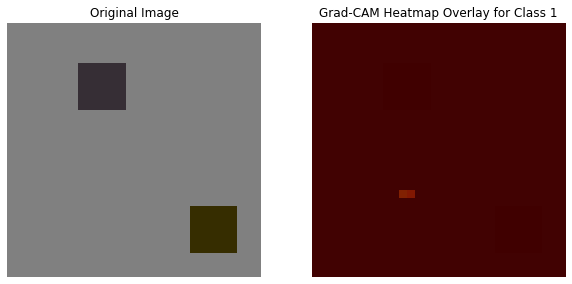

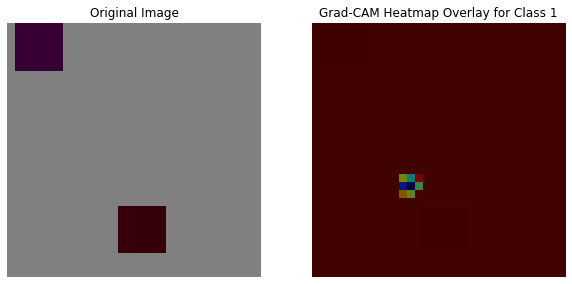

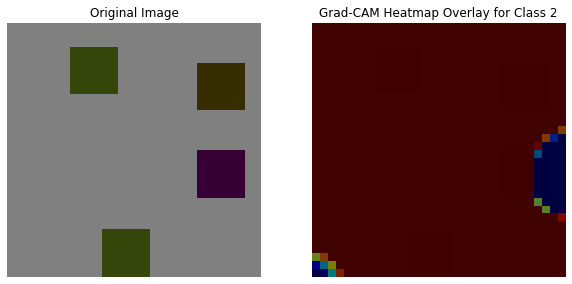

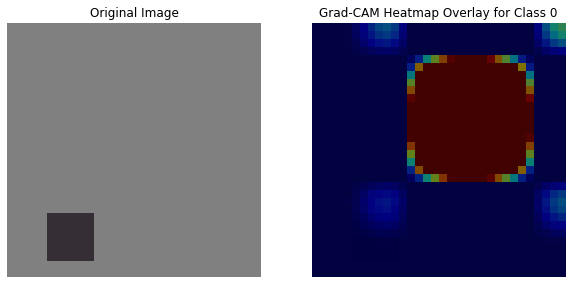

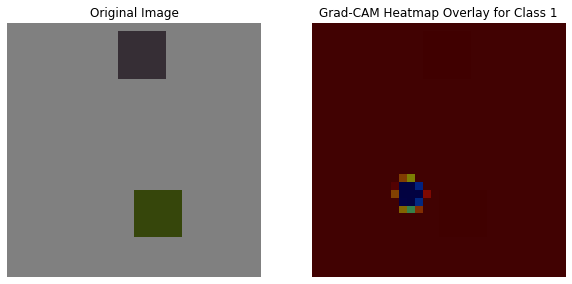

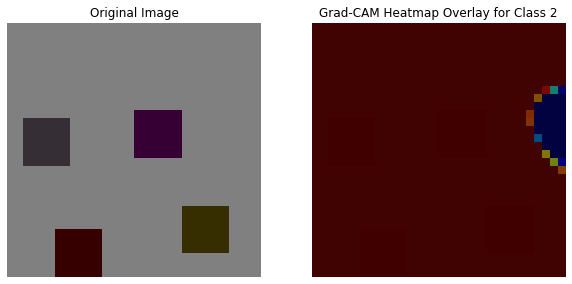

/tmp/ipykernel_2327220/3270769660.py:45: RuntimeWarning: invalid value encountered in divide
  heatmap = heatmap / np.max(heatmap)  # Normalize


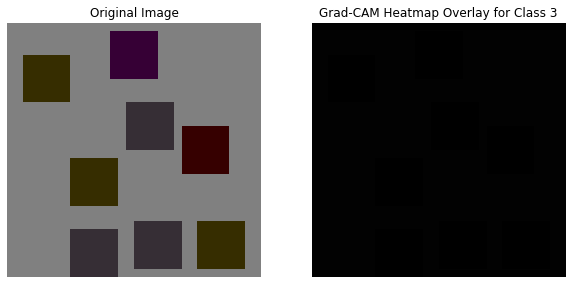

In [19]:
# Example usage
for images, labels in vali_loader:
    images = images[:, 21]  # Assuming first two images from the batch
    target_class = labels[0].item()  # Use the first label in the batch
    apply_gradcam(images, target_class)

In [5]:
# Save the model
torch.save(resnet_model.state_dict(), 'resnet_patch.pth')
print("Model saved as resnet_patch.pth")

Model saved as resnet_patch.pth
